In [1]:
from sqlalchemy import create_engine, MetaData, Table
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import sessionmaker

# Connexion à la base SQLite
engine_energy = create_engine("sqlite:///energy_consumption.db")

# Automap Base pour charger les tables existantes
Base = automap_base()
Base.prepare(engine_energy, reflect=True)

# Accéder aux classes générées dynamiquement
TrainData = Base.classes.train_data
TestData = Base.classes.test_data

# Création de la session pour la base
SessionEnergy = sessionmaker(bind=engine_energy)
session_energy = SessionEnergy()

# Vérifier les colonnes avec inspect
from sqlalchemy.inspection import inspect

def get_table_columns(table_class):
    """Récupère les noms des colonnes d'une table SQLAlchemy ORM."""
    inspector = inspect(table_class)
    return [column.name for column in inspector.columns]

# Lister les colonnes
train_columns = get_table_columns(TrainData)
print("Colonnes dans TrainData :", train_columns)

test_columns = get_table_columns(TestData)
print("Colonnes dans TestData :", test_columns)

Colonnes dans TrainData : ['id', 'nombre_declaration', 'surface_declaree', 'annee_consommation_2020', 'annee_consommation_2021', 'annee_consommation_2022', 'annee_consommation_Année de référence', 'zone_climatique_GUA', 'zone_climatique_GUY', 'zone_climatique_H1a', 'zone_climatique_H1b', 'zone_climatique_H1c', 'zone_climatique_H2a', 'zone_climatique_H2b', 'zone_climatique_H2c', 'zone_climatique_H2d', 'zone_climatique_H3', 'zone_climatique_MAR', 'zone_climatique_MAY', 'zone_climatique_REU', 'code_region_00', 'code_region_01', 'code_region_02', 'code_region_03', 'code_region_04', 'code_region_06', 'code_region_11', 'code_region_24', 'code_region_27', 'code_region_28', 'code_region_32', 'code_region_44', 'code_region_52', 'code_region_53', 'code_region_75', 'code_region_76', 'code_region_84', 'code_region_93', 'code_region_94', 'code_region_ND', 'code_departement_encoded', 'commune_frequency', 'vecteur_energie_Bois', 'vecteur_energie_Electricite', 'vecteur_energie_Fioul', 'vecteur_energie

C:\Users\aboys\AppData\Local\Temp\ipykernel_3920\1067995654.py:10: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine_energy, reflect=True)


In [ ]:
import pandas as pd

def get_statistics_with_pandas(session, table_class, columns):
    """Calcule les statistiques descriptives pour les colonnes spécifiées via Pandas."""
    # Charger les données de la table dans un DataFrame Pandas
    data = pd.read_sql(session.query(table_class).statement, session.bind)
    stats = {}
    for col in columns:
        stats[col] = {
            "min": data[col].min(),
            "max": data[col].max(),
            "mean": data[col].mean(),
            "std": data[col].std()  # Écart-type calculé avec pandas
        }
    return stats

# Liste des colonnes à analyser
columns_to_analyze = [
    "consommation_declaree",
    "densite_energetique",
    "ratio_declaration_consommation",
    "consommation_relative_climat",
    "surface_par_declaration",
    "consommation_log"
]

# Exemple d'exécution pour TrainData
train_stats = get_statistics_with_pandas(session_energy, TrainData, columns_to_analyze)
print("Statistiques descriptives pour TrainData :", train_stats)

Statistiques descriptives pour TrainData : {'consommation_declaree': {'min': np.float64(15699.0), 'max': np.float64(36031802.0), 'mean': np.float64(7262489.876025815), 'std': np.float64(7890199.434781845)}, 'densite_energetique': {'min': np.float64(0.0), 'max': np.float64(1.0), 'mean': np.float64(0.04609462904969893), 'std': np.float64(0.006208797707609907)}, 'ratio_declaration_consommation': {'min': np.float64(0.0), 'max': np.float64(1.0), 'mean': np.float64(0.9675548034463632), 'std': np.float64(0.039201585209949145)}, 'consommation_relative_climat': {'min': np.float64(0.0), 'max': np.float64(1.0), 'mean': np.float64(0.17598141973571388), 'std': np.float64(0.19311606131298442)}, 'surface_par_declaration': {'min': np.float64(0.0), 'max': np.float64(1.0), 'mean': np.float64(0.8291444548842284), 'std': np.float64(0.017469140038022704)}, 'consommation_log': {'min': np.float64(-4.482067749848343), 'max': np.float64(1.8084046368457996), 'mean': np.float64(7.925741614725044e-18), 'std': np.

In [3]:
import pandas as pd

def compute_correlations(session, table_class, target, features):
    """Calcule les corrélations entre une cible et plusieurs features."""
    # Charger les données dans un DataFrame
    data = pd.read_sql(session.query(table_class).statement, session.bind)
    # Calculer les corrélations
    correlations = data[features + [target]].corr()[target]
    return correlations

# Liste des colonnes explicatives
features_to_correlate = [
    "densite_energetique",
    "ratio_declaration_consommation",
    "consommation_relative_climat",
    "surface_par_declaration",
    "consommation_log"
]

# Exemple d'exécution pour TrainData
train_correlations = compute_correlations(session_energy, TrainData, "consommation_declaree", features_to_correlate)
print("Corrélations pour TrainData :", train_correlations)

Corrélations pour TrainData : densite_energetique               0.005928
ratio_declaration_consommation   -0.056601
consommation_relative_climat      0.840862
surface_par_declaration          -0.067725
consommation_log                  0.836202
consommation_declaree             1.000000
Name: consommation_declaree, dtype: float64


In [4]:
def get_anomalous_rows(session, table_class):
    """Récupère les lignes avec des valeurs anormales."""
    return session.query(table_class).filter_by(consommation_anormale_Anormale=1).all()

# Exemple d'exécution pour TrainData
anomalous_rows_train = get_anomalous_rows(session_energy, TrainData)
print(f"Lignes anormales dans TrainData : {len(anomalous_rows_train)}")

Lignes anormales dans TrainData : 15


In [5]:
def filter_by_zone_climatique(session, table_class, zone_climatique):
    """Filtre les lignes par une zone climatique spécifique."""
    return session.query(table_class).filter(getattr(table_class, zone_climatique) == 1).all()

# Exemple d'exécution pour une zone climatique spécifique
zone_climatique_rows = filter_by_zone_climatique(session_energy, TrainData, "zone_climatique_H1a")
print(f"Lignes pour zone climatique H1a dans TrainData : {len(zone_climatique_rows)}")

Lignes pour zone climatique H1a dans TrainData : 6327


In [6]:
def filter_by_vecteur_energie(session, table_class, vecteur_energie):
    """Filtre les lignes par un vecteur énergétique spécifique."""
    return session.query(table_class).filter(getattr(table_class, vecteur_energie) == 1).all()

# Exemple d'exécution pour un vecteur énergétique spécifique
vecteur_energie_rows = filter_by_vecteur_energie(session_energy, TrainData, "vecteur_energie_Gaz")
print(f"Lignes pour vecteur énergétique Gaz dans TrainData : {len(vecteur_energie_rows)}")

Lignes pour vecteur énergétique Gaz dans TrainData : 9032


In [9]:
def inspect_anomalous_rows(session, table_class):
    """Inspecter les lignes identifiées comme anormales."""
    query = session.query(table_class).filter(table_class.consommation_anormale_Anormale == 1)
    anomalous_rows = query.all()
    return anomalous_rows

# Exemple d'exécution pour TrainData
anomalous_rows_train = inspect_anomalous_rows(session_energy, TrainData)
print("Lignes anormales dans TrainData :", len(anomalous_rows_train))
for row in anomalous_rows_train:
    print(row.__dict__)

Lignes anormales dans TrainData : 15
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000024BF5FE37D0>, 'annee_consommation_Année de référence': 1.0, 'zone_climatique_H2c': 0.0, 'code_region_02': 0.0, 'code_region_28': 0.0, 'code_region_93': 0.0, 'vecteur_energie_Gaz': 1.0, 'surface_par_declaration': 0.8290582433428461, 'zone_climatique_GUA': 0.0, 'zone_climatique_H2d': 0.0, 'code_region_03': 0.0, 'code_region_32': 0.0, 'code_region_94': 0.0, 'vecteur_energie_Non spécifié': 0.0, 'consommation_log': 0.7011061014189025, 'nombre_declaration': -0.1691432351116401, 'zone_climatique_GUY': 0.0, 'zone_climatique_H3': 0.0, 'code_region_04': 0.0, 'code_region_44': 1.0, 'code_region_ND': 0.0, 'vecteur_energie_Reseau de chaleur': 0.0, 'consommation_declaree': 9227708.0, 'zone_climatique_H1a': 0.0, 'zone_climatique_MAR': 0.0, 'code_region_06': 0.0, 'code_region_52': 0.0, 'code_departement_encoded': 0.5926531420783135, 'vecteur_energie_Reseau de froid': 0.0, 'consommation_anor

In [10]:
from sqlalchemy.sql import func

def get_zone_climatique_columns(table_class):
    """Récupère dynamiquement toutes les colonnes liées aux zones climatiques."""
    inspector = inspect(table_class)
    return [column.name for column in inspector.columns if column.name.startswith("zone_climatique_")]

def get_zone_climatique_distribution_dynamic(session, table_class):
    """Calcule la distribution pour toutes les zones climatiques de manière dynamique."""
    zone_columns = get_zone_climatique_columns(table_class)
    query = session.query(
        *[func.sum(getattr(table_class, col)).label(col) for col in zone_columns]
    )
    return query.one(), zone_columns

# Exemple d'exécution pour TrainData
zone_distribution_train, zone_columns_train = get_zone_climatique_distribution_dynamic(session_energy, TrainData)
zone_distribution_train = dict(zip(zone_columns_train, zone_distribution_train))
print("Distribution dynamique par zones climatiques dans TrainData :", zone_distribution_train)

Distribution dynamique par zones climatiques dans TrainData : {'zone_climatique_GUA': 31.0, 'zone_climatique_GUY': 15.0, 'zone_climatique_H1a': 6327.0, 'zone_climatique_H1b': 3031.0, 'zone_climatique_H1c': 4859.0, 'zone_climatique_H2a': 1971.0, 'zone_climatique_H2b': 3404.0, 'zone_climatique_H2c': 2811.0, 'zone_climatique_H2d': 673.0, 'zone_climatique_H3': 1903.0, 'zone_climatique_MAR': 21.0, 'zone_climatique_MAY': 9.0, 'zone_climatique_REU': 47.0}


In [16]:
from sqlalchemy.sql import func

def get_vecteur_energetique_columns(table_class):
    """Récupère dynamiquement toutes les colonnes liées aux vecteurs energetiques."""
    inspector = inspect(table_class)
    return [column.name for column in inspector.columns if column.name.startswith("vecteur_energie_")]

def get_vecteur_energetique_distribution_dynamic(session, table_class):
    """Calcule la distribution pour toutes les vecteurs energetiques de manière dynamique."""
    vecteur_columns = get_vecteur_energetique_columns(table_class)
    query = session.query(
        *[func.sum(getattr(table_class, col)).label(col) for col in vecteur_columns]
    )
    return query.one(), vecteur_columns

# Exemple d'exécution pour TrainData
vecteur_distribution_train, vecteur_columns_train = get_vecteur_energetique_distribution_dynamic(session_energy, TrainData)
vecteur_distribution_train = dict(zip(vecteur_columns_train, vecteur_distribution_train))
print("Distribution dynamique par vecteurs energetiques dans TrainData :", vecteur_distribution_train)

Distribution dynamique par vecteurs energetiques dans TrainData : {'vecteur_energie_Bois': 98.0, 'vecteur_energie_Electricite': 12773.0, 'vecteur_energie_Fioul': 829.0, 'vecteur_energie_Gaz': 9032.0, 'vecteur_energie_Non spécifié': 1819.0, 'vecteur_energie_Reseau de chaleur': 541.0, 'vecteur_energie_Reseau de froid': 10.0}


In [14]:
import pandas as pd

def detect_outliers(session, table_class, column_name, threshold=3):
    """Détecter les outliers basés sur un z-score simple."""
    data = pd.read_sql(session.query(table_class).statement, session.bind)
    mean = data[column_name].mean()
    std = data[column_name].std()
    outliers = data[(data[column_name] < mean - threshold * std) | (data[column_name] > mean + threshold * std)]
    return outliers

# Exemple d'exécution pour TrainData
outliers_train = detect_outliers(session_energy, TrainData, "consommation_declaree")
print("Outliers dans TrainData :", outliers_train)

Outliers dans TrainData :           id  nombre_declaration  surface_declaree  annee_consommation_2020  \
13        14            1.673739          0.845264                      1.0   
116      117            7.481611          4.372468                      0.0   
125      126            3.963381          3.154546                      1.0   
230      231            3.963381          3.012857                      0.0   
243      244            2.511413          2.662800                      0.0   
...      ...                 ...               ...                      ...   
24790  24791            2.790638          2.116368                      0.0   
24793  24794            3.460777          3.928548                      1.0   
24888  24889            4.856900          1.978426                      0.0   
24900  24901            2.176343          2.250197                      1.0   
24970  24971            3.460777          3.928548                      1.0   

       annee_consommation

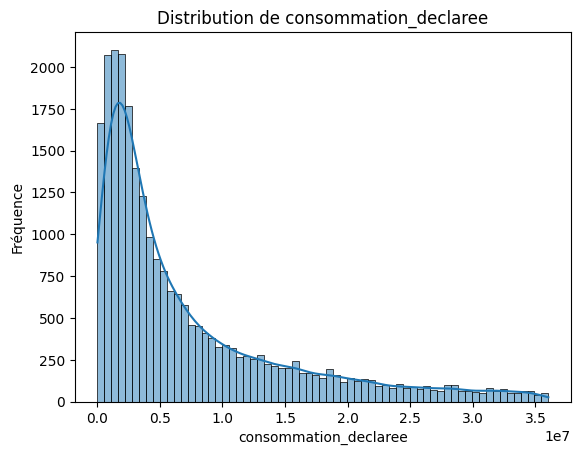

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(session, table_class, column_name):
    """Tracer la distribution d'une colonne spécifique."""
    data = pd.read_sql(session.query(table_class).statement, session.bind)
    sns.histplot(data[column_name], kde=True)
    plt.title(f"Distribution de {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Fréquence")
    plt.show()

# Exemple d'exécution pour consommation_declaree
plot_distribution(session_energy, TrainData, "consommation_declaree")

# Récupération des données de la DB en dataframes pour les modèles d'IA

In [ ]:
import pandas as pd
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base

# Connexion à la base de données
engine_energy = create_engine("sqlite:///energy_consumption.db")

# Automap Base pour charger les tables existantes
Base = automap_base()
Base.prepare(engine_energy, reflect=True)

# Accéder aux classes générées dynamiquement
TrainData = Base.classes.train_data
TestData = Base.classes.test_data

# Création de la session pour la base
SessionEnergy = sessionmaker(bind=engine_energy)
session_energy = SessionEnergy()  # Instanciation correcte de la session

# Requêtes pour les tables
query_train = session_energy.query(TrainData)
query_test = session_energy.query(TestData)

# Chargement des données dans des DataFrames pandas
df_train_data = pd.read_sql(query_train.statement, session_energy.bind)
df_test_data = pd.read_sql(query_test.statement, session_energy.bind)

# Affichage des premières lignes des DataFrames
print(df_train_data.head())
print(df_test_data.head())

C:\Users\aboys\AppData\Local\Temp\ipykernel_3920\2690717371.py:11: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine_energy, reflect=True)


   id  nombre_declaration  surface_declaree  annee_consommation_2020  \
0   1           -0.448368         -0.236886                      0.0   
1   2           -0.336678          0.500740                      0.0   
2   3           -0.504213         -0.126760                      0.0   
3   4           -0.671748         -0.723467                      0.0   
4   5            1.003600          0.100618                      0.0   

   annee_consommation_2021  annee_consommation_2022  \
0                      0.0                      0.0   
1                      1.0                      0.0   
2                      0.0                      0.0   
3                      1.0                      0.0   
4                      0.0                      1.0   

   annee_consommation_Année de référence  zone_climatique_GUA  \
0                                    1.0                  0.0   
1                                    0.0                  0.0   
2                                    1.0 